
<img src="img/1.png">

# Supervised Machine Learning Approaches in order to Optimise The Performance of Energy Storage Devices on Smart Grids

<img src="img/2.png">


## 1- Introduction

  
In this investigation different regression approaches will be used to optimise battery operations in the smart grid. As wind speed and solar radiation intensity fluctuat during a day, amounts of electrical energy produced by wind power plants and solar power plants are not stable and they do not have fixed power generation during days months and years. One way to smoothing out the fluctuations in energy generation and demand is using an external electrical energy storage like a couple of battery storages which are able to charge and discharge in the moments that is needed. To optimise moments of charging and discharging essential data have been collected by several sensors that measure wind speed, solar intensity, temperature , energy consumption and other factors that are effective. In this optimising process several regression methodes will be used to predict optimise value for battery energy in each moment and finally with the help of KNN classification method the best predicted value by regression methodes will be shown.

## 2- Data Manegment
### 2-1 Data Preparation 
 The data which will be used in this investigation is not real and its just a sample that consist amounts of wind speed , temperature, solar radiation intensity and other key factors like energy consumption which have been collected using measurment equipment in 48 hours.

### 2-2 Data Exploration

#### 2-2-1 Initialization
You can disable line below if you have installed "mlxtend" before.

In [1]:
#pip install mlxtend

In [2]:
import pywt
import os.path
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt




from math import sqrt
from pathlib import Path
from scipy.stats import iqr
from seaborn import pairplot

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#### 2-2-2 Data examination

In [3]:
## Loading data and determining the header
data_folder = Path("data.csv")
data=pd.read_csv(data_folder , header=2)
dfr=pd.DataFrame(data)

print("Data set dimensions : {}".format(data.shape))
data.head()


Data set dimensions : (50, 11)


,Day or Night,Hours,Wind speed (Km/h),Wind plant working percantage,Air density (Kg/m3),Solar radietion intensity (Kwh/m2),Solar plant working percantage,Temprature (C),Relative humidity (%),Energy consumption (MWh),Battery Energy (Mwh)
0,Night,1,NaN,100,NaN,0,100,NaN,85,1.3,0.2
1,Night,2,55,100,1.225,0,100,25,85,1.2,0.29
2,Night,3,60,100,1.225,0,100,24,85,1.2,0.28
3,Night,4,65,100,1.225,0,100,24,85,1.1,0.37
4,Night,5,60,100,1.225,0,100,24,83,1,0.48


In [4]:
# removing needless columns and raws
dfr.drop(49,axis=0,inplace=True)
dfr.drop('Hours', axis=1 , inplace=True )


In [5]:
#Encoding

#Maping each category to a vector that contains 1 and 0 denoting the presence or absence of the feature
#In "time" column 0 means that it is night , 1 shows that is is day and NAN means it is not clear

dfr=pd.get_dummies(dfr, prefix=['Time'] , columns=["Day or Night"])

day=dfr["Time_Day"]
night=dfr["Time_Night"]

time=day*2+night
time
time=time.replace([0, 1, 2], [np.nan, 0, 1])

dfr=dfr.drop('Time_Day', axis=1,)
dfr=dfr.drop('Time_Night', axis=1,)

dfr['time']=time

In [6]:
#considering abbreviated name to each feature inorder to easy use

df=dfr.copy()


df.columns=["wind_s"]+["wind_p"]+["ad"]+["solar_r"]+["solar_p"]+["temp"]+["rh"]+["eng"]+["b_eng"]+["time"]

df.index.name= "NUM"
df

,wind_s,wind_p,ad,solar_r,solar_p,temp,rh,eng,b_eng,time
NUM,,,,,,,,,,
0,NaN,100,NaN,0,100,NaN,85,1.3,0.2,0.0
1,55,100,1.225,0,100,25,85,1.2,0.29,0.0
2,60,100,1.225,0,100,24,85,1.2,0.28,0.0
3,65,100,1.225,0,100,24,85,1.1,0.37,0.0
4,60,100,1.225,0,100,24,83,1,0.48,0.0
5,60,100,1.225,0,100,24,85,1.1,0.38,NaN
6,55,100,1.225,100,100,28,85,1.2,0.34,1.0
7,50,100,1.225,300,100,29,85,1.3,0.37,1.0
8,50,100,1.225,700,100,30,85,1.4,0.7,1.0


In [7]:
# changing data type from object to float

df=df.astype(float)



In [8]:
# chenging order of columns
df=df[["time","wind_s","wind_p","ad","solar_r","solar_p","temp","rh","eng","b_eng"]]


#Defining parameters that will be used further

columns=["Time","Wind speed (Km/h)","Wind plant working percantage","Air density (Kg/m3)","Solar radietion intensity (Kwh/m2)",
         "Solar plant working percantage" ,"Temprature (C)","Relative humidity (%)","Energy consumption (MWh)",
         "Battery Energy (Mwh)"]


columns9=["Time","Wind speed (Km/h)","Wind plant working percantage","Air density (Kg/m3)","Solar radietion intensity (Kwh/m2)",
         "Solar plant working percantage" ,"Temprature (C)","Relative humidity (%)","Energy consumption (MWh)"]

Z=["red" ,"skyblue" , "green" , "orange" , "yellow" , "purple" , "brown" , "pink" , "darkblue" , "darkred"] 




#### 2-2-3 Data visualization

In [9]:
# Visualizing the central tendency, dispersion and shape of a dataset’s distribution
df.loc[:, df.columns != 'time'].describe()

,wind_s,wind_p,ad,solar_r,solar_p,temp,rh,eng,b_eng
count,46.000000,47.000000,46.000000,47.000000,47.000000,45.000000,47.000000,48.000000,48.000000
mean,54.130435,98.297872,1.225000,355.319149,98.723404,28.577778,84.957447,1.489583,0.273042
std,5.897678,6.014168,0.000211,421.079622,5.363735,3.285567,0.358587,0.301937,0.292944
min,40.000000,70.000000,1.224000,0.000000,70.000000,24.000000,83.000000,1.000000,-0.257000
25%,50.000000,100.000000,1.225000,0.000000,100.000000,25.000000,85.000000,1.200000,0.086500
50%,55.000000,100.000000,1.225000,100.000000,100.000000,29.000000,85.000000,1.450000,0.255000
75%,60.000000,100.000000,1.225000,800.000000,100.000000,32.000000,85.000000,1.725000,0.455000
max,65.000000,100.000000,1.226000,1100.000000,100.000000,33.000000,86.000000,2.000000,0.800000


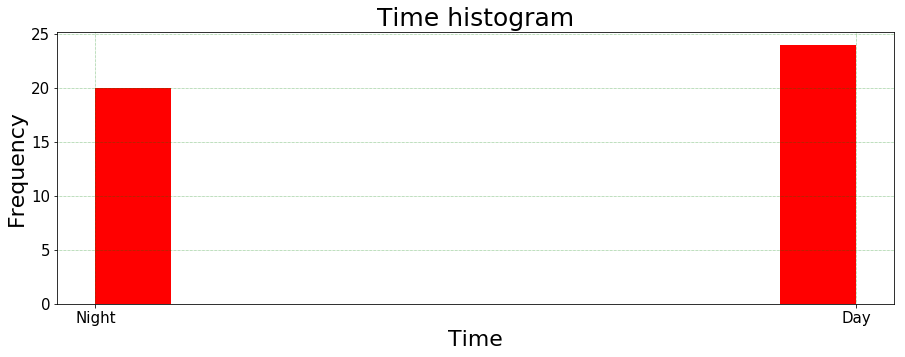

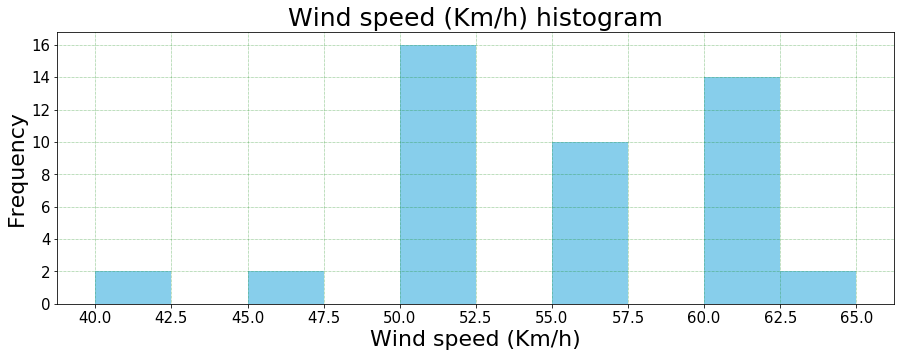

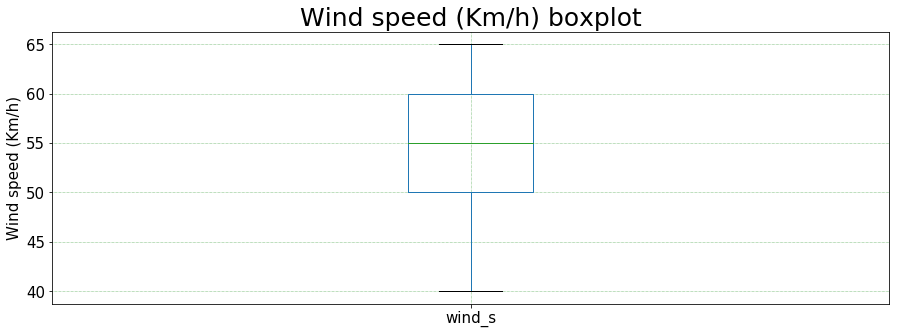

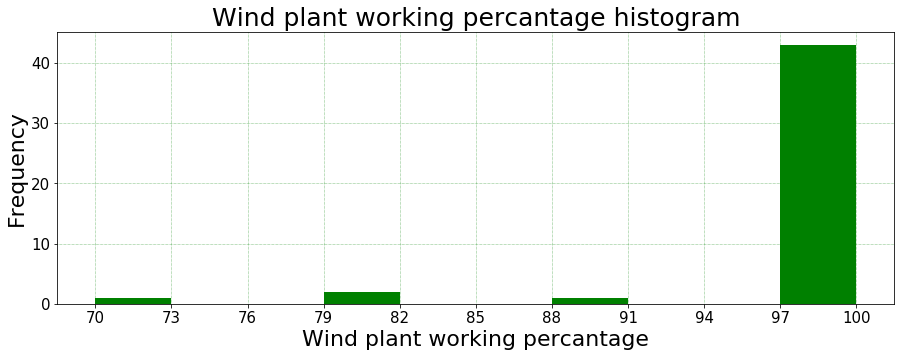

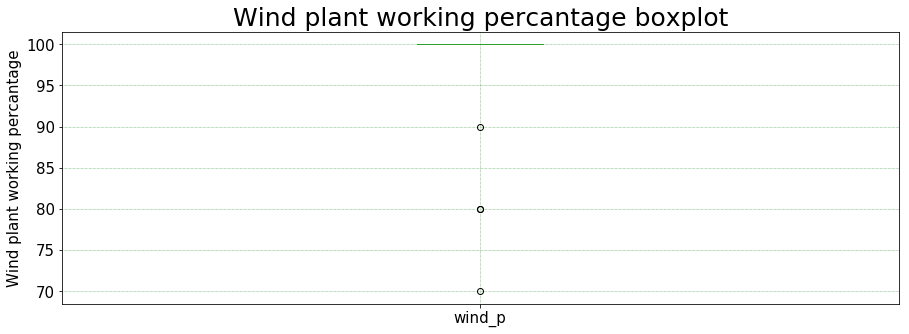

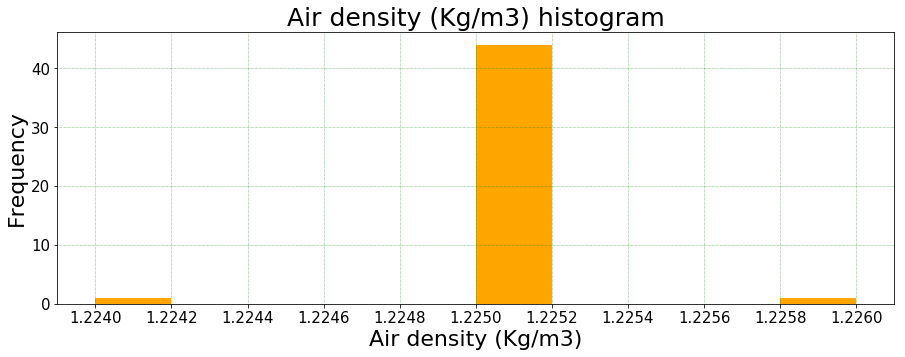

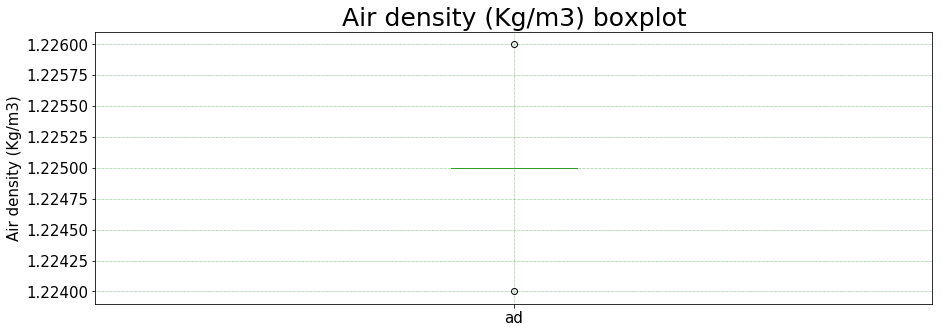

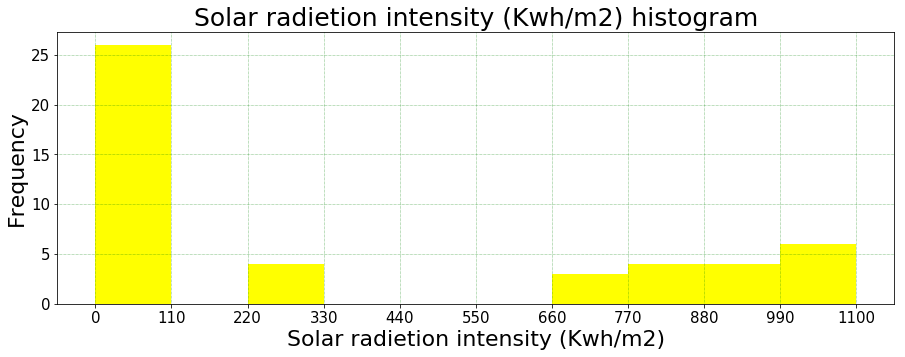

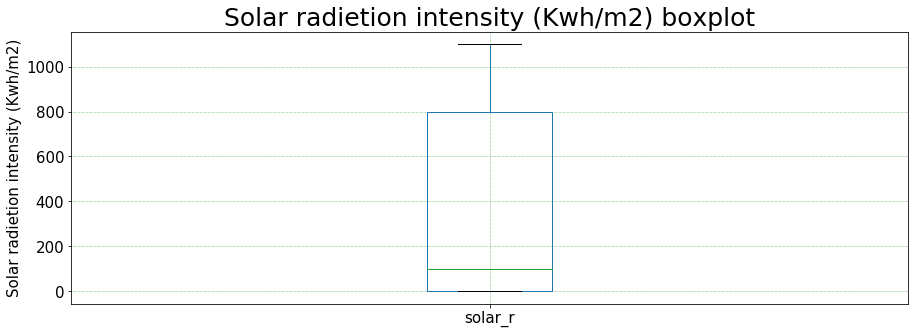

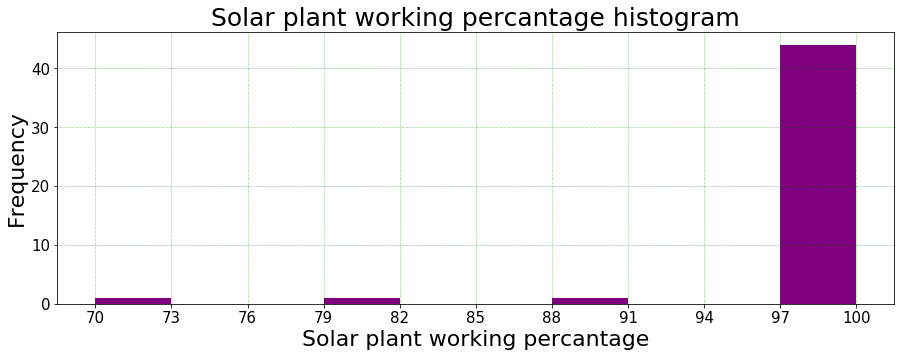

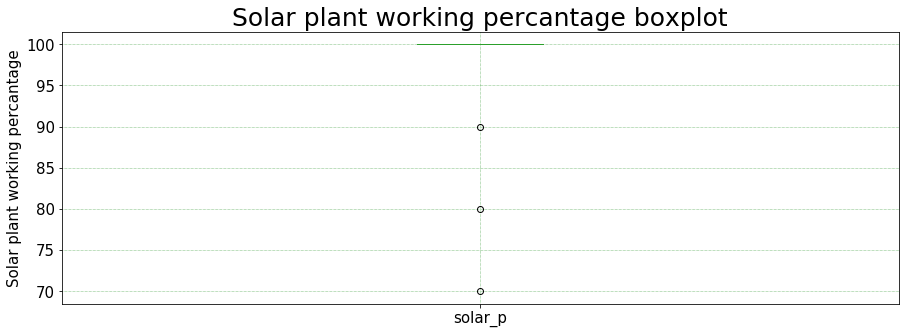

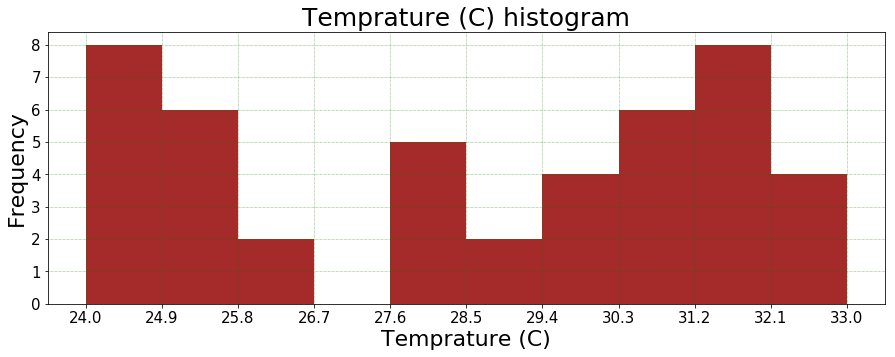

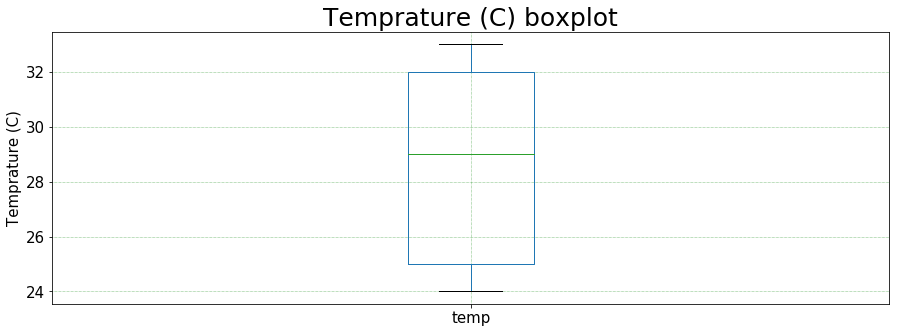

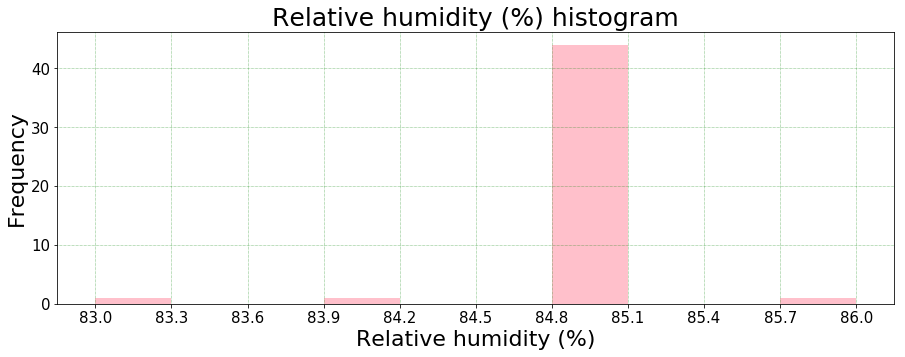

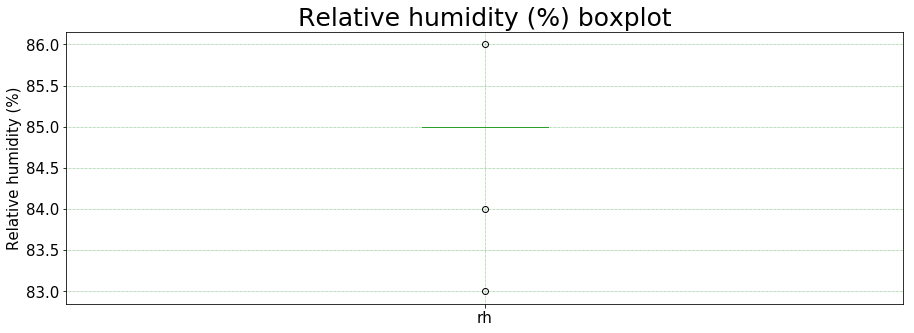

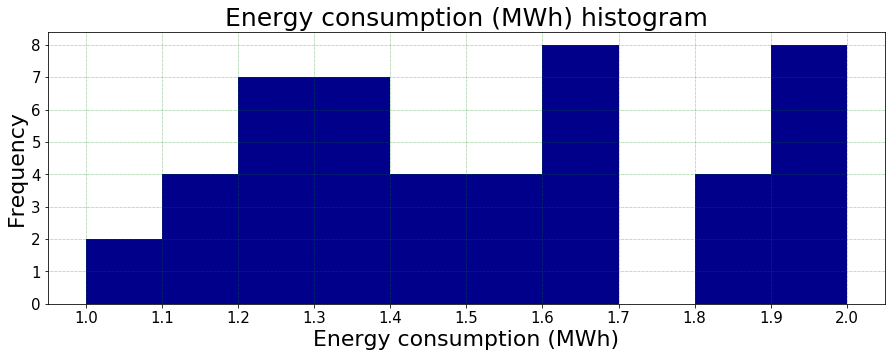

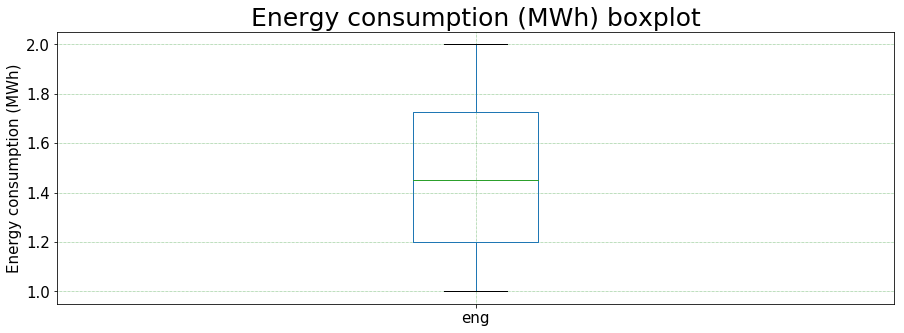

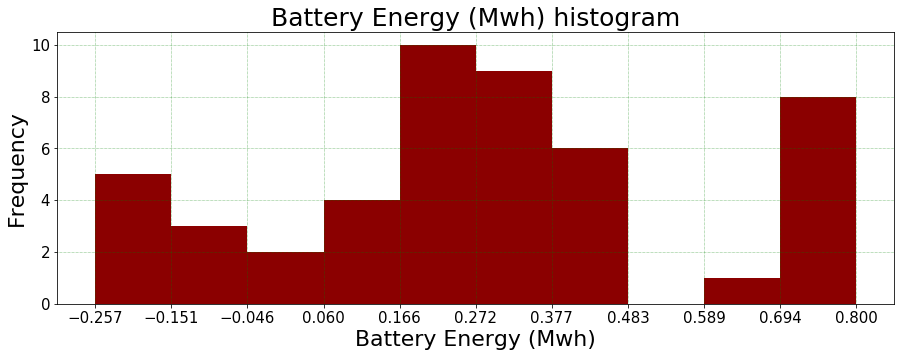

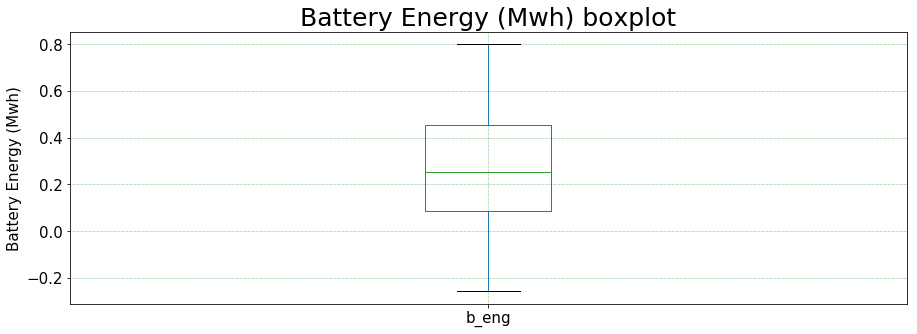

In [10]:
# Visualizing data histogram plot

b=10
e=1e-08

labelsize=15
figsize=(15,5)
titlefontsize=25
labelfontsize=22
blabelfontsize=15



 
    
for i, j, z in zip(df.columns , columns , Z) :
    plt.figure(figsize=(8,5))
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.title("{} histogram".format(j) , fontsize=titlefontsize) 
    df[i].plot.hist(bins=b, color=z ,figsize=figsize)
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel(j ,fontsize=labelfontsize)
    plt.ylabel("Frequency", fontsize=labelfontsize)
    F=(np.nanmax(df[i])-np.nanmin(df[i]))/b+e
    plt.xticks(np.arange(np.nanmin(df[i]), np.nanmax(df[i])+F, F))
    if i=='time':
        plt.xticks([0 , 1],["Night","Day"])
    plt.show()
    if i!='time':
        plt.rc('xtick',labelsize=labelsize)
        plt.rc('ytick',labelsize=labelsize)
        df.boxplot(column=i ,figsize=figsize)
        plt.title("{} boxplot".format(j) , fontsize=titlefontsize) 
        plt.ylabel(j,fontsize=blabelfontsize)
        plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
        plt.show() 

    
   


### 2-3 Data Cleaning

#### 2-3-1 Cheking out Duplicates

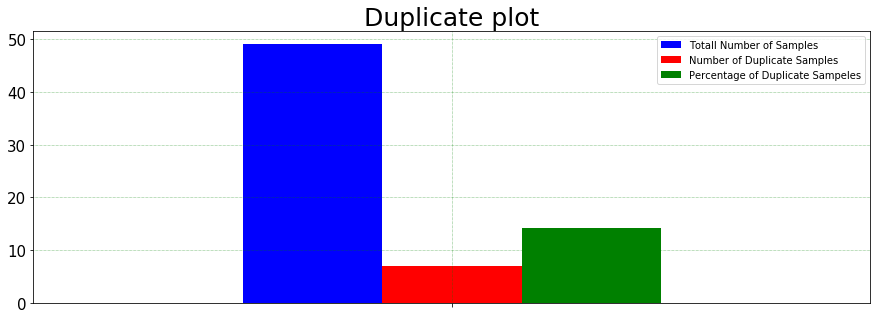

In [11]:

v=df.shape[0]

df=df.drop_duplicates(keep="first") 
df.reset_index(drop=True , inplace=True)
df.index.name= "NUM"

w=df.shape[0]

z=v-w

pz=(z/v)*100

c=pd.DataFrame({"Totall Number of Samples":v , 'Number of Duplicate Samples':z , "Percentage of Duplicate Sampeles":pz}
               , index=[" "])

c.plot.bar(color ={"blue":v, "red":z , "green":pz}, figsize=(15,5))
plt.title('Duplicate plot', fontsize=25)   
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()


#### 2-3-2 Checking out Missing Values

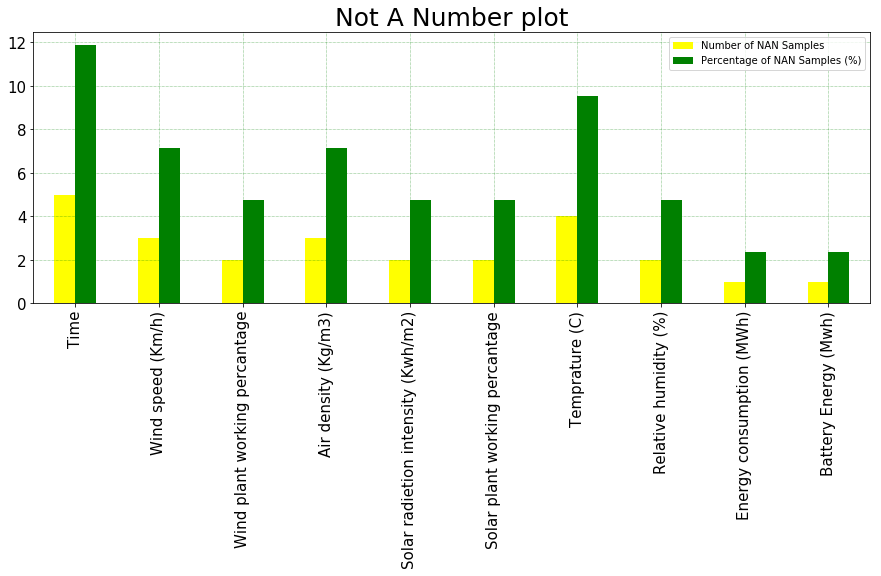

In [12]:
## counting the number of missing values



#NAN=data_df.isna().sum()
NAN=df.isnull().sum()
Total=df.count()+NAN
Percent=(NAN/Total)*100


T_N_df=pd.DataFrame({'Number of NAN Samples':NAN , "Percentage of NAN Samples (%)":Percent})


T_N_df.index=columns
T_N_df.plot.bar(color ={"yellow":NAN , "green":Percent }, figsize=(15,5))
plt.title('Not A Number plot', fontsize=25)
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

#### 2-3-3 Processing Missing Values

In [13]:
#dff=df.fillna(df.mean())


## Remoweing column or rows with more than half missing values
df=df.loc[df.count(1) > df.shape[1]/2, df.count(0) > df.shape[0]/2]


## Replacing missing values with the average of the real number before and after them
df1=df.fillna(method='ffill')
df1=df1.fillna(method='bfill')
df2=df.fillna(method='bfill')
df2=df2.fillna(method='ffill')
df=(df1+df2)/2

#In the situation that NAN in the "day" column is between day and night 
#according to this project we prefer to guess that it is night instead of day

df["time"]=df["time"].replace([0.5], [0])


#display(df1)
#display(df2)
#display(df)


#### 2-3-4 Checking out Outliers

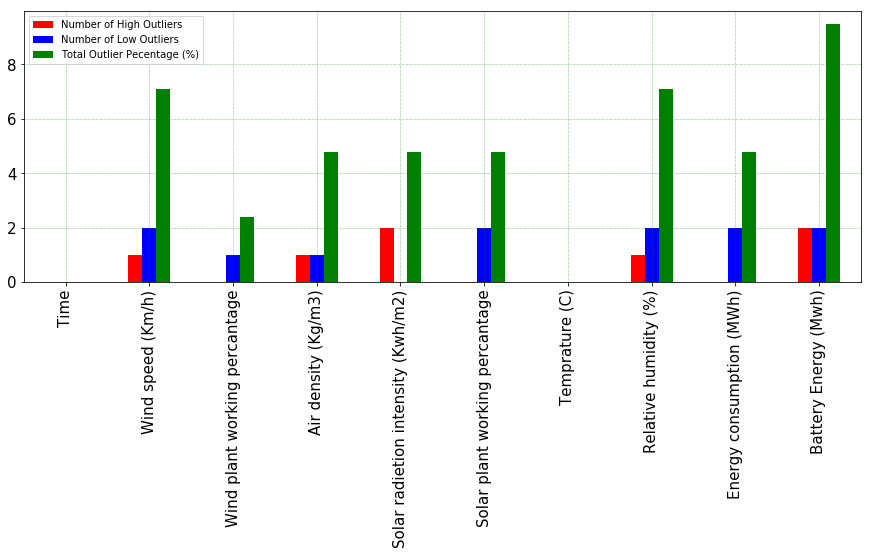

In [14]:
# finding values that are lower than 5 percentile and greater than 95 percentile as outliers

L=np.nanpercentile(df, 5, axis=0)
H=np.nanpercentile(df, 95, axis=0)


Hcount=df[df > H].count()
Lcount=df[df < L].count()

out_count=Hcount+Lcount
out_percent=(out_count/Total)*100

Hcount_df=pd.DataFrame({"Number of High Outliers":Hcount , "Number of Low Outliers":Lcount ,
                        'Total Outlier Pecentage (%)':out_percent})


Hcount_df=Hcount_df.round(1)
Hcount_df.index=columns

Hcount_df.plot.bar(color={"red":Hcount , "blue":Lcount , "green":out_percent}, figsize=(15,5))
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

#### 2-3-5 Processing Outliers

In [15]:
# replacing high outliers with the amount of 95 percentile and low outliers with the amount of 5 percentile

dff=pywt.threshold(df, L, 'greater', L) # bozorgtar az L ha ra negahdra baghi ra ba L jaygozin kon
dff=pywt.threshold(df, H, 'less', H)


dff=pd.DataFrame(dff)
dff.columns=df.columns
dff.index.name= "NUM"
dff=dff.round(2)


### 2-4 Feature Engineering

In [16]:
#Seperating features and the target to two table
x_raw=dff.drop('b_eng', axis=1,)
y=dff['b_eng']

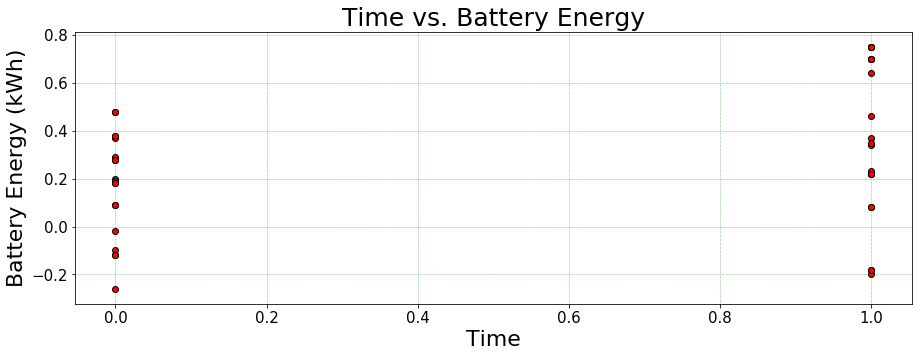

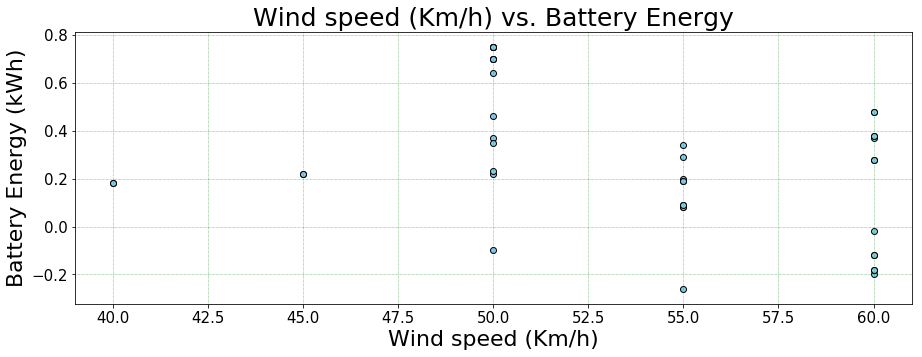

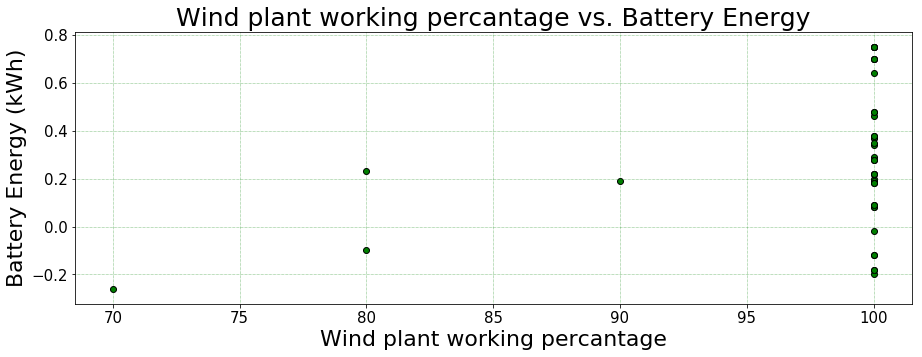

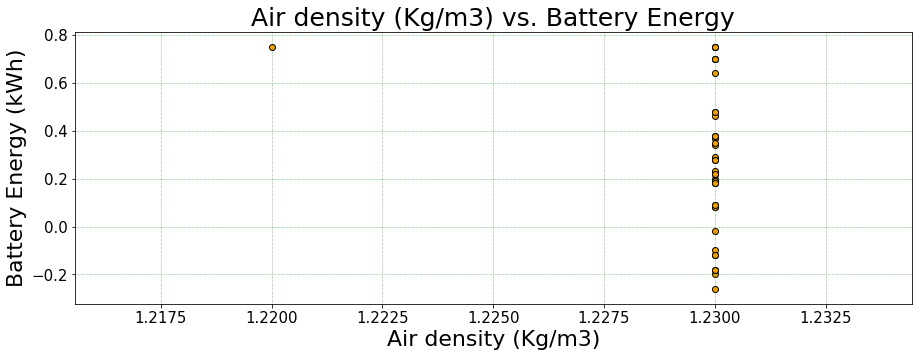

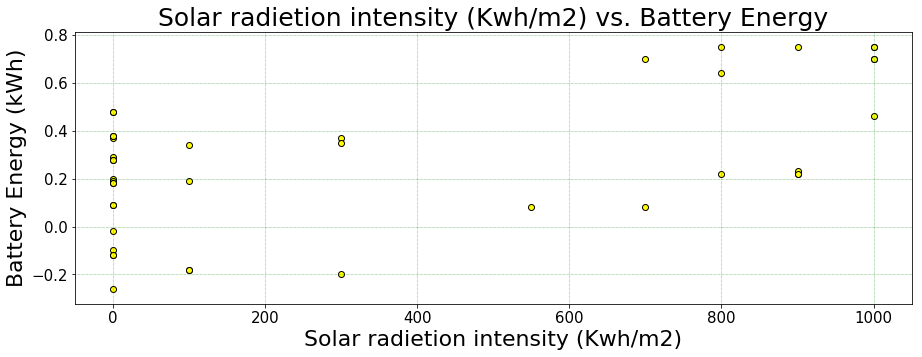

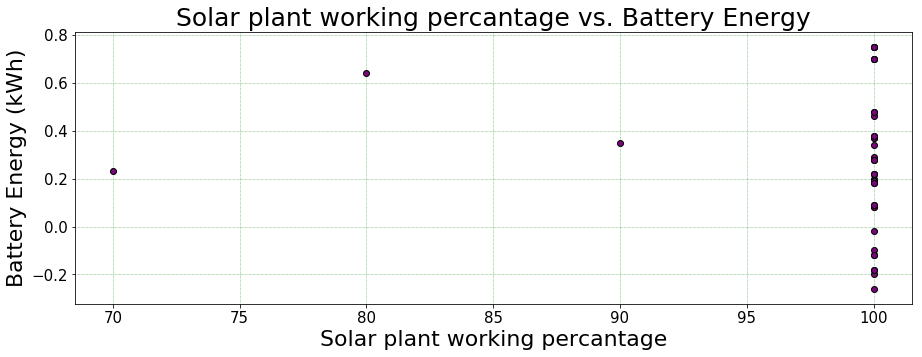

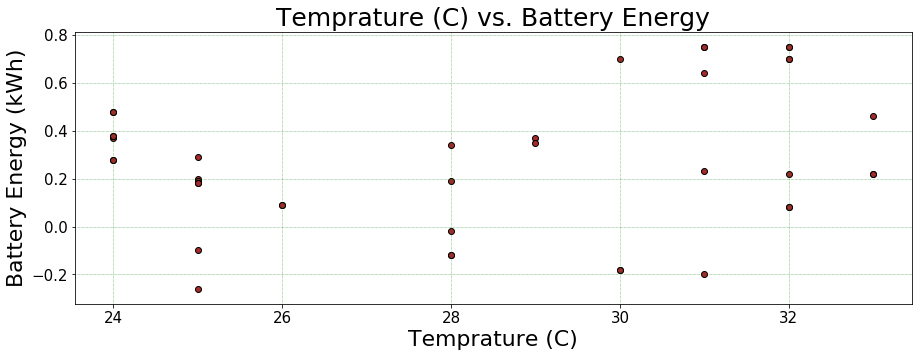

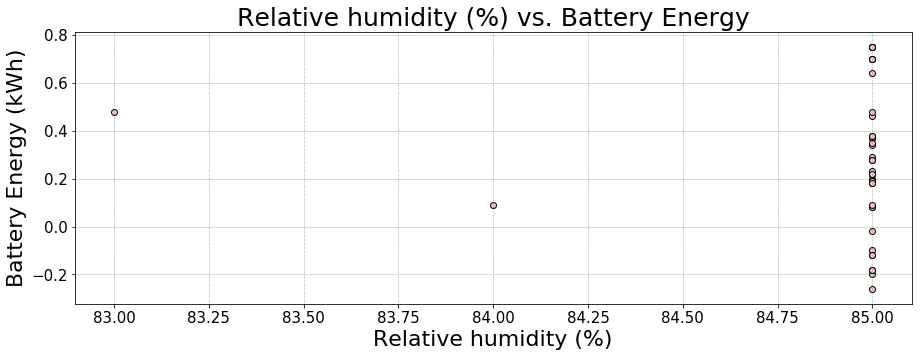

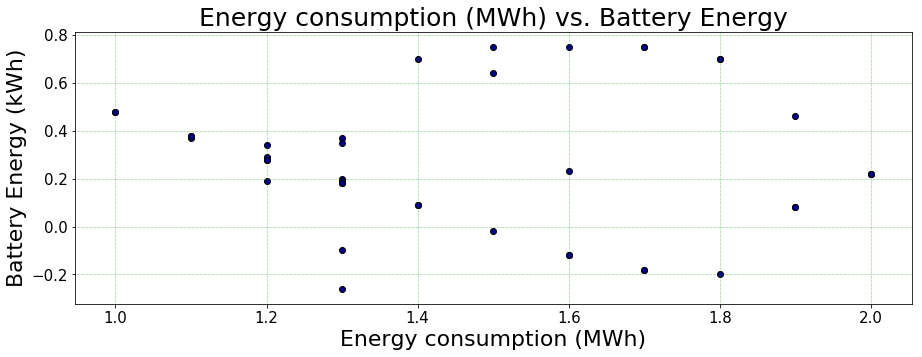

In [17]:
#Showing the relationship between the features and the target

x_plot=x_raw.copy()
x_plot.columns=columns9
# display(x_plot)
for i, j, z in zip(x_raw.columns , columns9 , Z) :
    plt.figure(figsize=figsize)
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.title("{} vs. Battery Energy".format(j) , fontsize=titlefontsize) 
    plt.scatter(x_raw[i], y ,color=z ,edgecolor='k')
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel(j ,fontsize=labelfontsize)
    plt.ylabel("Battery Energy (kWh)", fontsize=labelfontsize)
    plt.show()

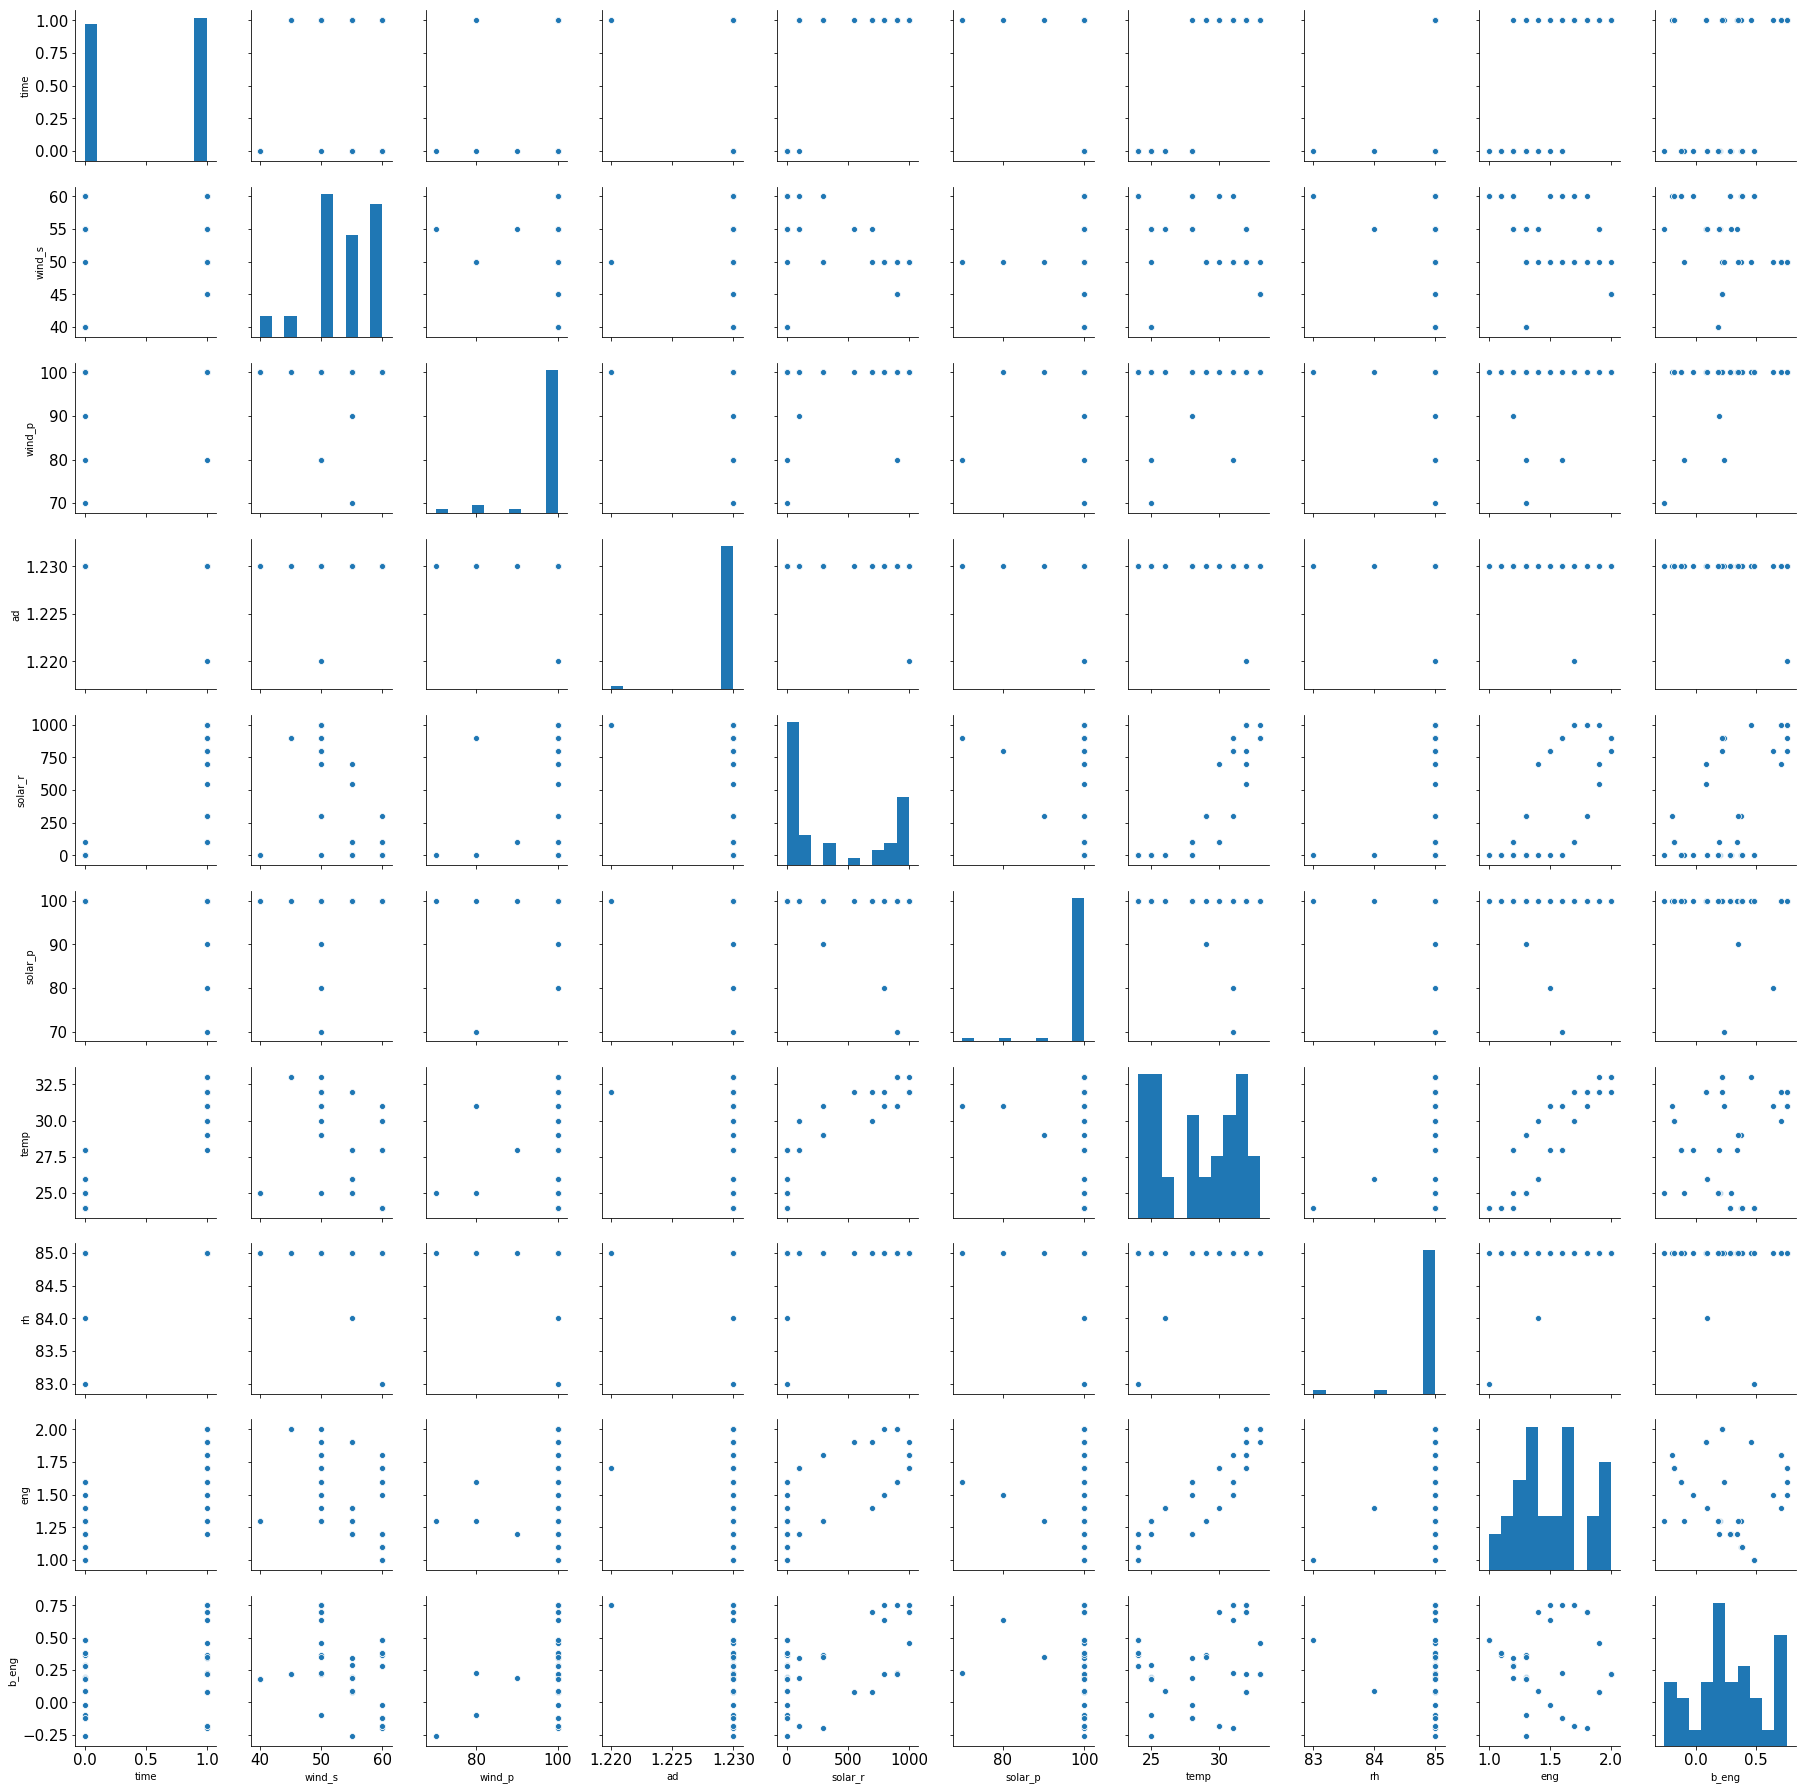

In [18]:
# Pairwise scatter plot
pairplot(dff)

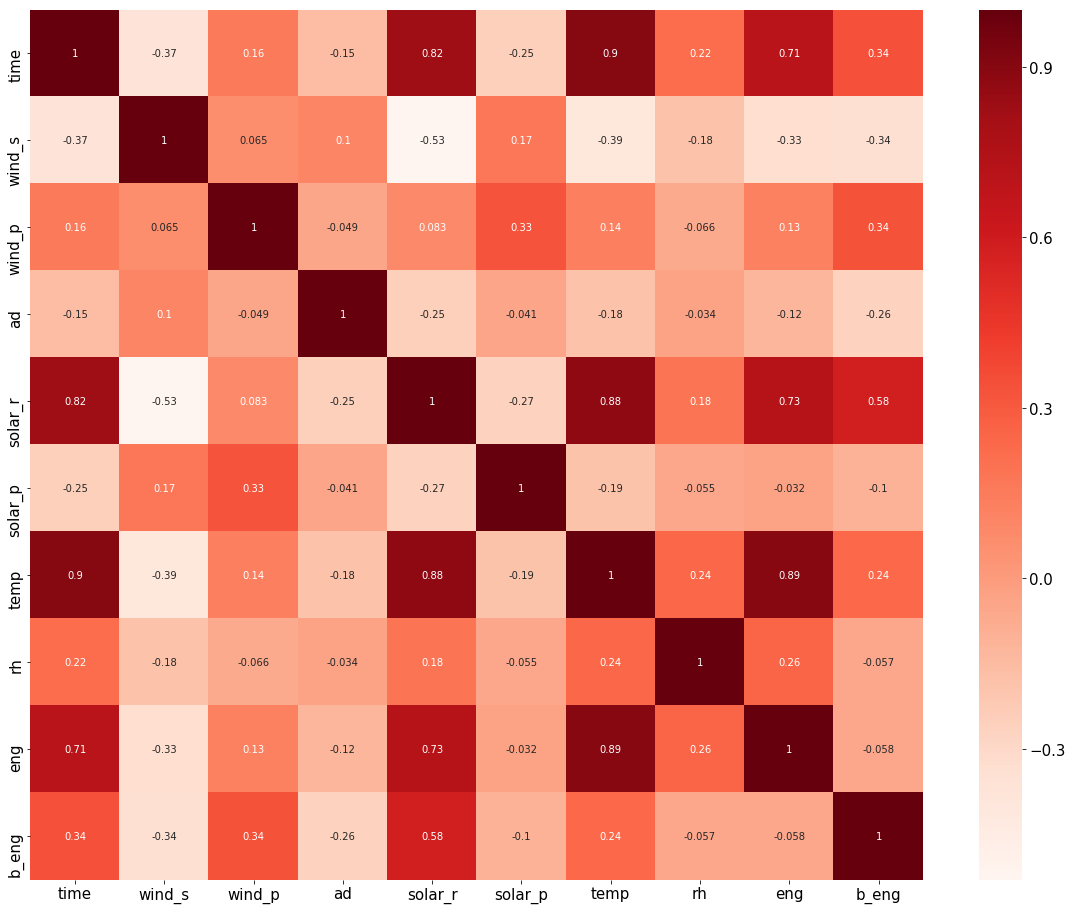

In [19]:
# Heatmap plot

plt.figure(figsize=(20,16))
plt.rc('xtick',labelsize=labelsize)
plt.rc('ytick',labelsize=labelsize)
cor = dff.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2-5 Feature Scaling

In [20]:

scaler = preprocessing.StandardScaler().fit(x_raw)
# scaler.mean_
# scaler.scale_
x=pd.DataFrame(scaler.transform(x_raw))
x.columns=x_raw.columns


### 2-6  Feature Selection

In [21]:
#Wrapper Method


sfs1 = sfs (estimator=LinearRegression(),  
           forward=False ,
           k_features="parsimonious")




sfs1 = sfs1.fit(x, y, custom_feature_names=columns9)


feat_cols = list(sfs1.k_feature_idx_)
feat_cols_names = list(sfs1.k_feature_names_)


print("Selcted Features are:")
print(feat_cols_names)
print("SFS score is= %f" % sfs1.k_score_)
x_sfs=x.iloc[:, feat_cols]


Selcted Features are:
['Time', 'Wind plant working percantage', 'Solar radietion intensity (Kwh/m2)', 'Energy consumption (MWh)']
SFS score is= 0.903085


In [22]:
#Embedded Methods



# Ridge
print("Ridge regression feature selection")
reg_R = RidgeCV(alphas=(0.01, 0.1 , 1 , 10))
reg_R.fit(x, y)
alpha_R=reg_R.alpha_
coef_R = pd.Series(reg_R.coef_, index = columns9)
print(*['Alpha =', alpha_R])
print(*['Score =', reg_R.score(x, y)])
print("Coefficients in Ridge regression are:")
display(coef_R)
print("-----------------------------------------------------------")

# Lasso




print("Lasso regression feature selection")
reg_LA = LassoCV(alphas=(0.01, 0.1 , 1 , 10) , cv=3)
reg_LA.fit(x, y)
alpha_LA=reg_LA.alpha_
coef_LA = pd.Series(reg_LA.coef_, index = columns9)
print(*['Alpha =', alpha_LA])
print(*['Score =', reg_LA.score(x, y)])
print("Coefficients in Lasso regression are:")
display(coef_LA)
print("-----------------------------------------------------------")

# ElasticNet

print("ElasticNet regression feature selection")
reg_E =  ElasticNetCV(alphas=(0.01, 0.1 , 1 , 10) , cv=3)
reg_E.fit(x, y)
alpha_E=reg_E.alpha_
coef_E = pd.Series(reg_E.coef_, index = columns9)
print(*['Alpha =', alpha_E])
print(*['Score =', reg_E.score(x, y)])
print("Coefficients in ElasticNet regression are:")
display(coef_E)



Ridge regression feature selection
Alpha = 0.1
Score = 0.980141836413713
Coefficients in Ridge regression are:


Time                                 -0.030186
Wind speed (Km/h)                     0.001188
Wind plant working percantage         0.095739
Air density (Kg/m3)                  -0.005576
Solar radietion intensity (Kwh/m2)    0.426953
Solar plant working percantage        0.031022
Temprature (C)                       -0.021746
Relative humidity (%)                 0.001645
Energy consumption (MWh)             -0.298017
dtype: float64

-----------------------------------------------------------
Lasso regression feature selection
Alpha = 0.01
Score = 0.9604625710072476
Coefficients in Lasso regression are:


Time                                 -0.000000
Wind speed (Km/h)                    -0.000000
Wind plant working percantage         0.085590
Air density (Kg/m3)                  -0.003271
Solar radietion intensity (Kwh/m2)    0.356512
Solar plant working percantage        0.018292
Temprature (C)                       -0.000000
Relative humidity (%)                -0.000000
Energy consumption (MWh)             -0.276975
dtype: float64

-----------------------------------------------------------
ElasticNet regression feature selection
Alpha = 0.01
Score = 0.9719145547979313
Coefficients in ElasticNet regression are:


Time                                 -0.013773
Wind speed (Km/h)                    -0.000000
Wind plant working percantage         0.089852
Air density (Kg/m3)                  -0.005363
Solar radietion intensity (Kwh/m2)    0.379932
Solar plant working percantage        0.024073
Temprature (C)                       -0.000000
Relative humidity (%)                -0.000000
Energy consumption (MWh)             -0.288469
dtype: float64

In [23]:
# showing which features have been selected by which method

coef_RC=coef_R.copy()
coef_LAC=coef_LA.copy()
coef_EC=coef_E.copy()

coef=pd.DataFrame({"Ridge regrassion": coef_RC , "Lasso regrassion": coef_LAC , "ElasticNet regrassion": coef_EC})  

columns=pd.DataFrame(columns9).copy()


xx=x.iloc[0,:].copy()
xx= pd.Series(xx, index = columns9)

xx=pd.DataFrame({"SFS (Used in Linear regression)":xx})
xx.iloc[:,0]="⨉"
xx.iloc[feat_cols,:]="✔"


coef_C=coef.copy()
coef_C["SFS (Used in Linear regression)"]=xx
z=-1
for i , j , k in zip(coef["Ridge regrassion"] , coef["Lasso regrassion"] , coef ["ElasticNet regrassion"]) :
    z=z+1
    u=columns.iloc[z , 0]
    if i==0 :
        coef_C.loc[u , "Ridge regrassion"]="⨉"
    else:
        coef_C.loc[u , "Ridge regrassion"]="✔"
    if j==0 :
        coef_C.loc[u , "Lasso regrassion"]="⨉"
    else:
        coef_C.loc[u , "Lasso regrassion"]="✔"
    if k==0 :
        coef_C.loc[u , "ElasticNet regrassion"]="⨉"
    else:
        coef_C.loc[u , "ElasticNet regrassion"]="✔"




display(coef_C)





,Ridge regrassion,Lasso regrassion,ElasticNet regrassion,SFS (Used in Linear regression)
Time,✔,⨉,✔,✔
Wind speed (Km/h),✔,⨉,⨉,⨉
Wind plant working percantage,✔,✔,✔,✔
Air density (Kg/m3),✔,✔,✔,⨉
Solar radietion intensity (Kwh/m2),✔,✔,✔,✔
Solar plant working percantage,✔,✔,✔,⨉
Temprature (C),✔,⨉,⨉,⨉
Relative humidity (%),✔,⨉,⨉,⨉
Energy consumption (MWh),✔,✔,✔,✔


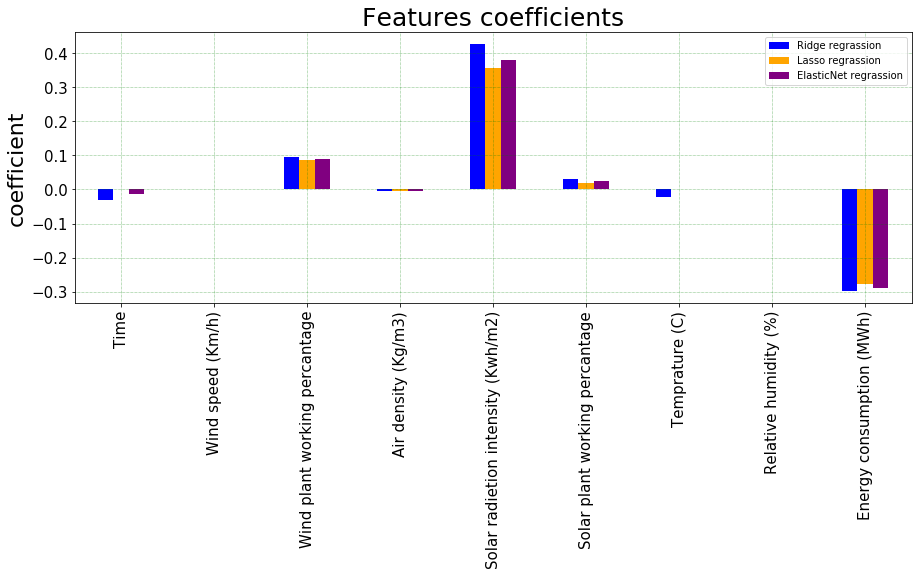

In [24]:
# plotting features coefficients

coef.plot.bar(color={ "blue":"Ridge regression" ,
                              "orange":"Lasso regression" , "purple":"ElasticNet regression" },
                       figsize=figsize)
plt.title('Features coefficients', fontsize=titlefontsize)   
plt.ylabel('coefficient', fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

## 3- Model Selection

### 3-1 Evaluation Methods

In [25]:
 
seed = 7
test_size = 0.33

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

x_train_sfs, x_test_sfs, y_train_sfs , y_test_sfs = model_selection.train_test_split(x_sfs, y, test_size=test_size, random_state=seed)


In [26]:

kfold = model_selection.KFold(n_splits=3 , random_state=seed)

### 3-2  Regression Methods


#### 3-2-1 Linear Regression


In [27]:

L = LinearRegression()

In [28]:
fitted=L.fit(x_train_sfs, y_train_sfs)
result_LT = L.score(x_test_sfs, y_test_sfs)
y_pred_LT=L.predict(x_test_sfs)

print("Accuracy: %.3f%%" % (result_LT*100.0))

Accuracy: 97.465%


In [29]:
L.fit(x_sfs, y)
results_LK = model_selection.cross_val_score(L, x_sfs, y, cv=kfold)
y_pred_LK=L.predict(x_sfs)
errors_LK=y_pred_LK-y


# model.fit(x, y)
# results_LK = model_selection.cross_val_score(L, x, y, cv=kfold)
# y_pred_LK=L.predict(x)

print("Accuracy: %.3f%% (%.3f%%)" % (results_LK.mean()*100.0, results_LK.std()*100.0))
print (results_LK)

Accuracy: 93.219% (2.116%)
[0.91002619 0.96068999 0.92584636]


#### 3-2-2 Ridge Regression

In [30]:
R = Ridge(alpha=alpha_R)

In [31]:
R.fit(x_train, y_train)
result_RT = R.score(x_test, y_test)
y_pred_RT=R.predict(x_test)
print("Accuracy: %.3f%%" % (result_RT*100.0))

Accuracy: 97.882%


In [32]:
R.fit(x, y)
results_RK = model_selection.cross_val_score(R, x, y, cv=kfold)
y_pred_RK=R.predict(x)
errors_RK=y_pred_RK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_RK.mean()*100.0, results_RK.std()*100.0))
print (results_RK)

Accuracy: 94.846% (1.279%)
[0.95130301 0.96251888 0.9315709 ]


#### 3-2-3 Lasso Regression

In [33]:
LA = Lasso (alpha=alpha_LA)

In [34]:
LA.fit(x_train, y_train)
result_LAT = LA.score(x_test, y_test)
y_pred_LAT=LA.predict(x_test)
print("Accuracy: %.3f%%" % (result_LAT*100.0))

Accuracy: 95.138%


In [35]:
LA.fit(x, y)
results_LAK = model_selection.cross_val_score(LA, x, y, cv=kfold)
y_pred_LAK=LA.predict(x)
errors_LAK=y_pred_LAK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_LAK.mean()*100.0, results_LAK.std()*100.0))
print (results_LAK)

Accuracy: 87.231% (2.625%)
[0.84083379 0.90508992 0.87100766]


#### 3-2-4 ElasticNet Regression

In [36]:
E = ElasticNet(alpha =alpha_E)

In [37]:
E.fit(x_train, y_train)
result_ET = E.score(x_test, y_test)
y_pred_ET=E.predict(x_test)
print("Accuracy: %.3f%%" % (result_ET*100.0))



Accuracy: 96.305%


In [38]:
E.fit(x, y)
results_EK = model_selection.cross_val_score(E, x, y, cv=kfold)
y_pred_EK=E.predict(x)
errors_EK=y_pred_EK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_EK.mean()*100.0, results_EK.std()*100.0))
print (results_EK)

Accuracy: 91.678% (1.781%)
[0.90296492 0.94191997 0.90544527]


In [39]:

fitted=pd.DataFrame({"Linear Regression fitted values": y_pred_LK ,"Ridge Regression fitted values" : y_pred_RK,
                       "Lasso Regression fitted values": y_pred_LAK ,"ElasticNet Regression fitted values" : y_pred_EK})

errors=pd.DataFrame({"Linear Regression errors": errors_LK ,"Ridge Regression errors" : errors_RK,
                       "Lasso Regression errors": errors_LAK ,"ElasticNet Regression errors" : errors_EK})

AC=pd.DataFrame({"Accuracy (%) ":(results_LK.mean()*100.0 , results_RK.mean()*100.0 ,results_LAK.mean()*100.0 , results_EK.mean()*100.0)}
               , index=("Linear Regression", "Ridge Regression" , "Lasso Regression" ,"ElasticNet Regression" ))


## 4- Results and Errors

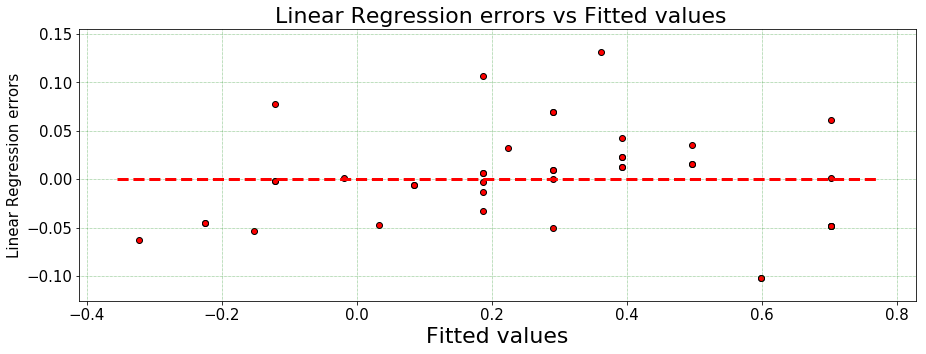

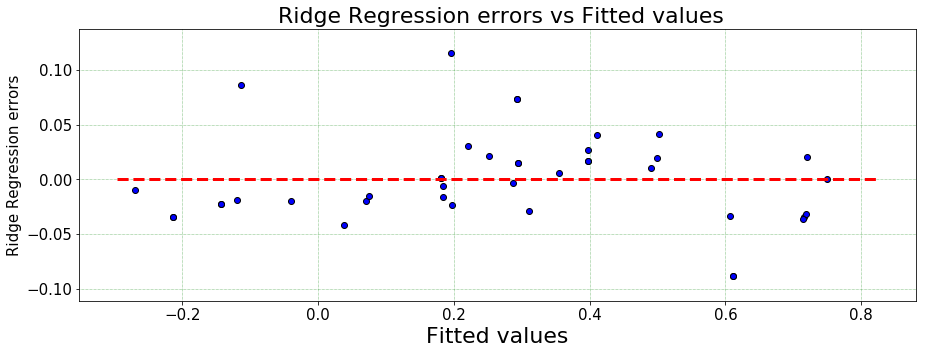

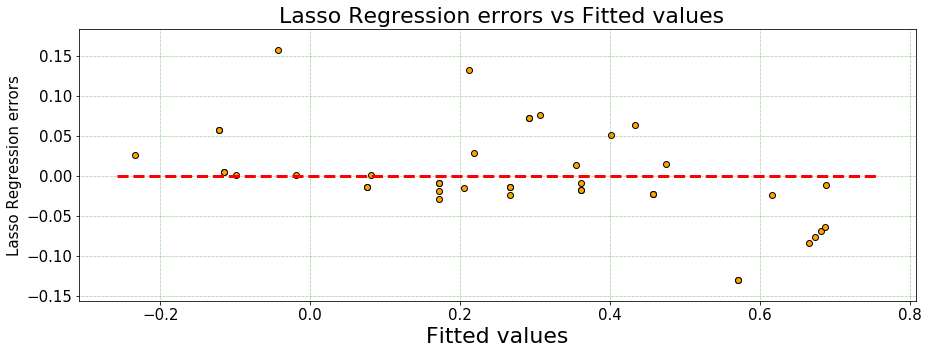

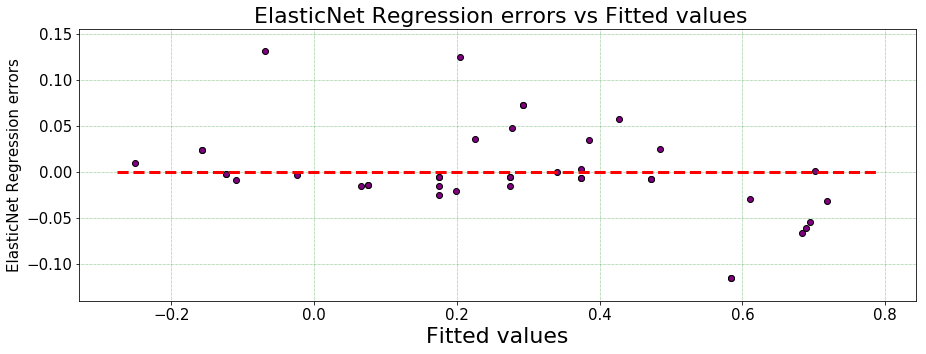

In [40]:
#plotting regression methods errors and fitted values
colors=["red"]+["blue"]+["orange"]+["purple"]


for i, j ,z in zip(fitted.columns, errors.columns , colors) :
    plt.figure(figsize=figsize)
    plt.title(" {} vs Fitted values".format(j) , fontsize=22) 
    plt.scatter(x=fitted[i] , y=errors[j] ,color=z ,edgecolor='k')
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel("Fitted values" ,fontsize=labelfontsize)
    plt.ylabel(j, fontsize=blabelfontsize)
    xmin=min(fitted[i])
    xmax =max(fitted[i])
    plt.hlines(y=0,xmin=xmin*1.1,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.show()

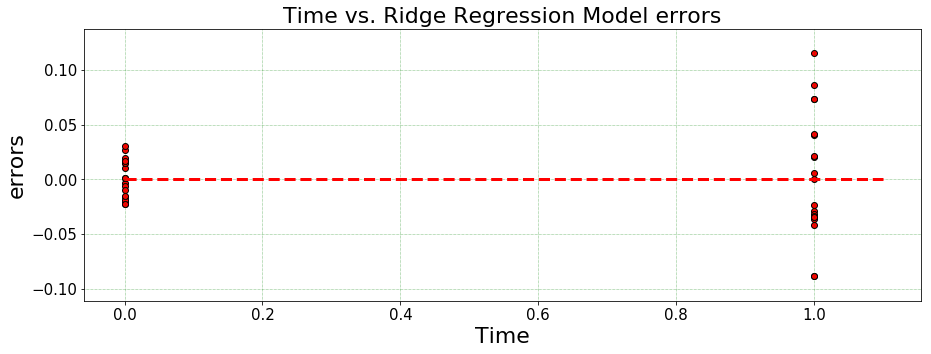

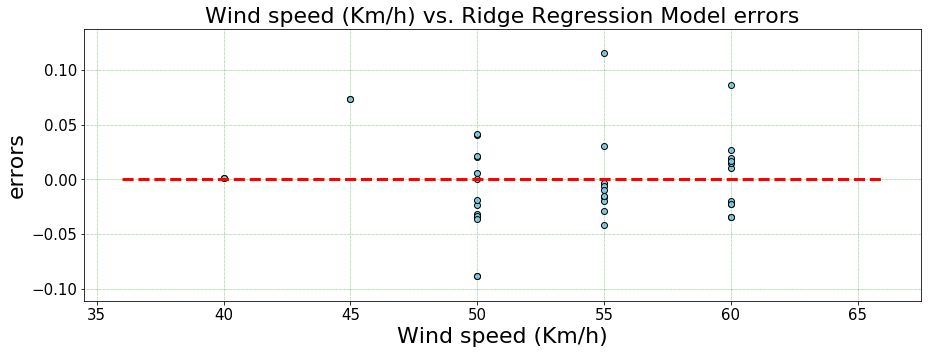

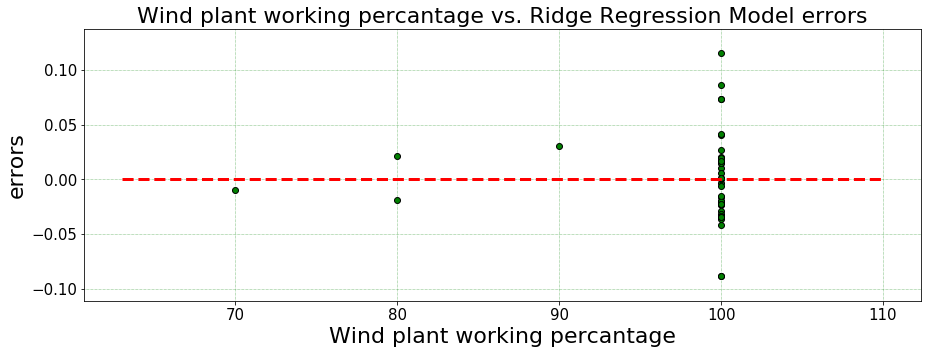

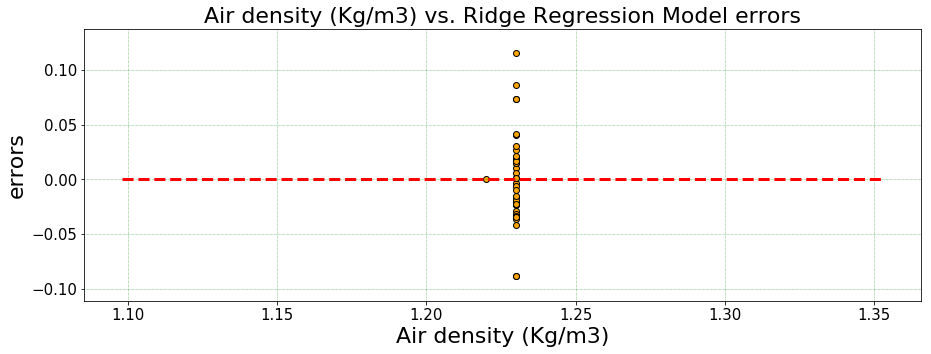

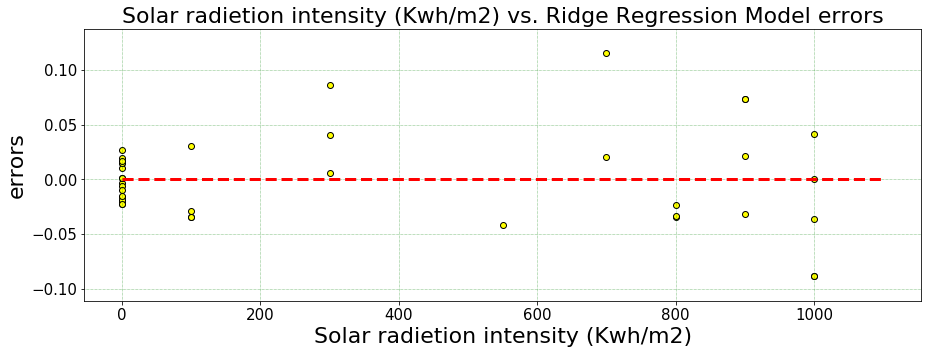

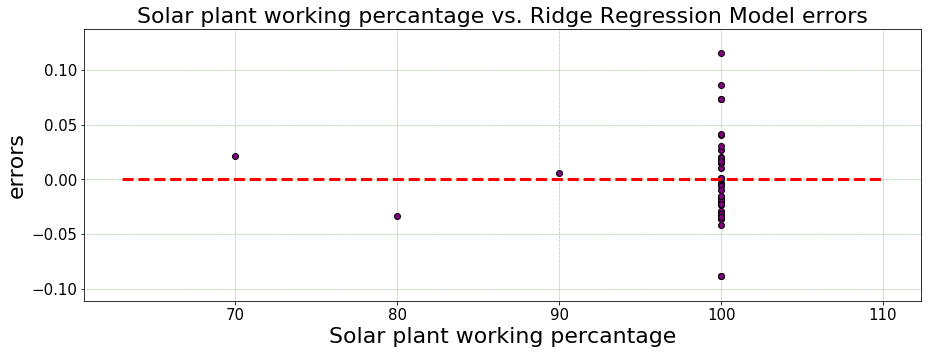

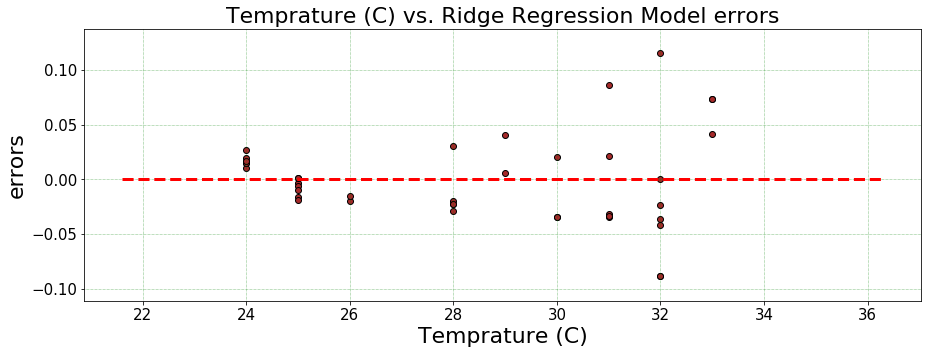

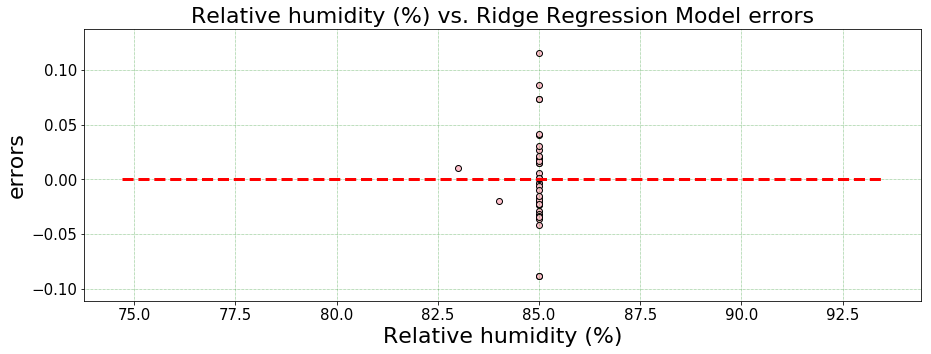

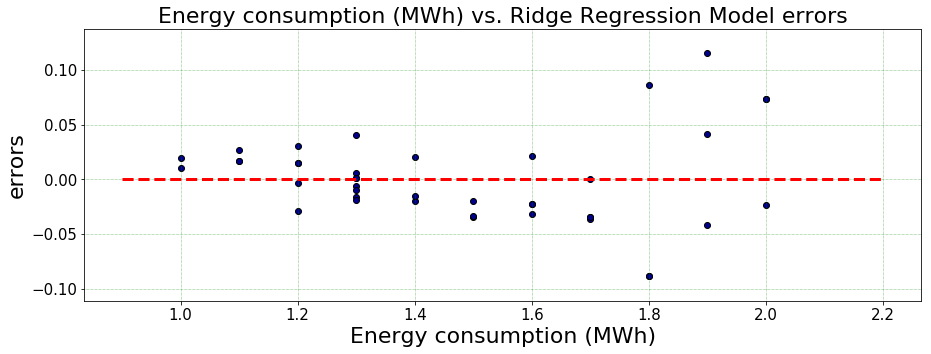

In [41]:
#plotting features and diffrent regression models errors

for i, j, z in zip(x_raw.columns , columns9 , Z) :
    plt.figure(figsize=figsize)
    plt.title("{} vs. Ridge Regression Model errors".format(j) , fontsize=22) 
    plt.scatter(x=x_raw[i],y=errors_RK,color=z ,edgecolor='k')
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel(j ,fontsize=labelfontsize)
    plt.ylabel("errors", fontsize=labelfontsize)
    xmin=min(x_raw[i])
    xmax = max(x_raw[i])
    plt.hlines(y=0, xmin=xmin*0.9 , xmax=xmax*1.1 , color='red',linestyle='--', lw=3)
    plt.show()

    

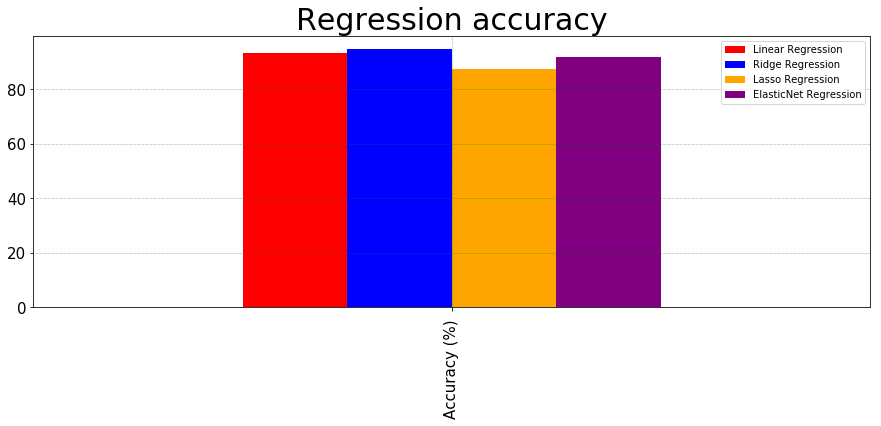

In [42]:
# plotting diffrent regression accuracy plot
AC.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                    "orange":"Lasso regression" ,"purple":"ElasticNet regression" }
             , figsize=(15,5))
plt.title('Regression accuracy', fontsize=30)
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()



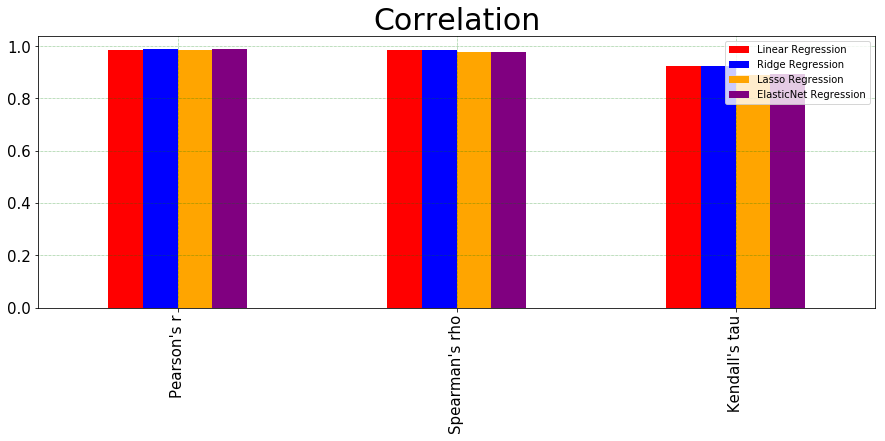

In [43]:
# plotting Correlation plot

pearsonr_LK=sp.stats.pearsonr(y, y_pred_LK)[0]
spearmanr_LK=sp.stats.spearmanr(y, y_pred_LK)[0]
kendalltau_LK=sp.stats.kendalltau(y, y_pred_LK)[0]

pearsonr_RK=sp.stats.pearsonr(y, y_pred_RK)[0]
spearmanr_RK=sp.stats.spearmanr(y, y_pred_RK)[0]
kendalltau_RK=sp.stats.kendalltau(y, y_pred_RK)[0]

pearsonr_LAK=sp.stats.pearsonr(y, y_pred_LAK)[0]
spearmanr_LAK=sp.stats.spearmanr(y, y_pred_LAK)[0]
kendalltau_LAK=sp.stats.kendalltau(y, y_pred_LAK)[0]

pearsonr_EK=sp.stats.pearsonr(y, y_pred_EK)[0]
spearmanr_EK=sp.stats.spearmanr(y, y_pred_EK)[0]
kendalltau_EK=sp.stats.kendalltau(y, y_pred_EK)[0]



r=pd.DataFrame({"Pearson's r":(pearsonr_LK,pearsonr_RK,pearsonr_LAK,pearsonr_EK), 
                "Spearman's rho":(spearmanr_LK , spearmanr_RK,spearmanr_LAK,spearmanr_EK) ,
                " Kendall's tau":( kendalltau_LK , kendalltau_RK ,kendalltau_LAK,kendalltau_EK)}
               , index=("Linear Regression", "Ridge Regression" , "Lasso Regression" ,"ElasticNet Regression" ))

r.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                    "orange":"Lasso regression" ,"purple":"ElasticNet regression" }
             , figsize=(15,5))
plt.title('Correlation', fontsize=30)
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()


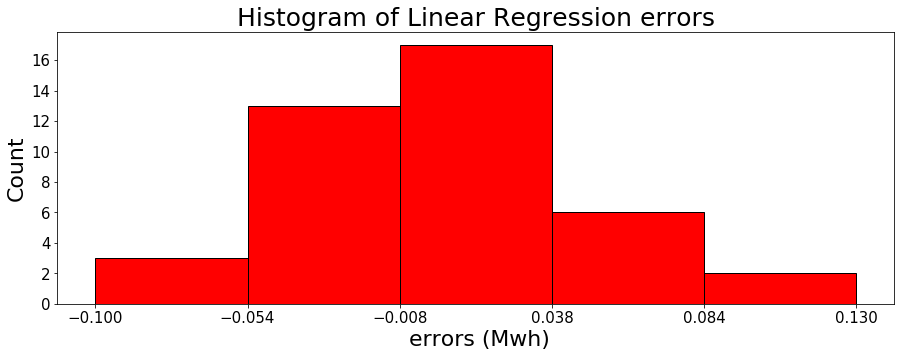

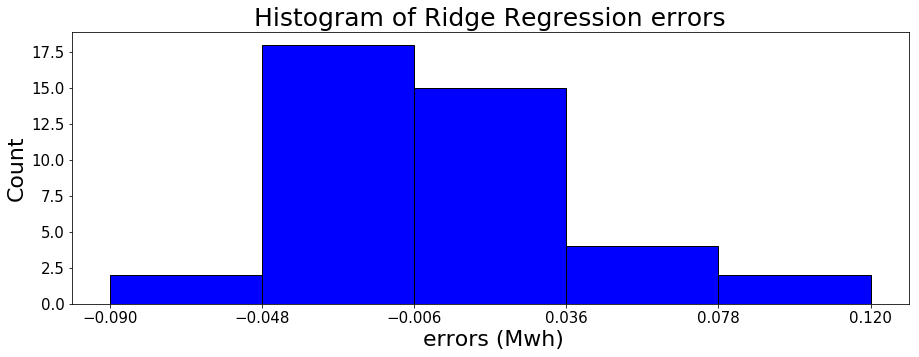

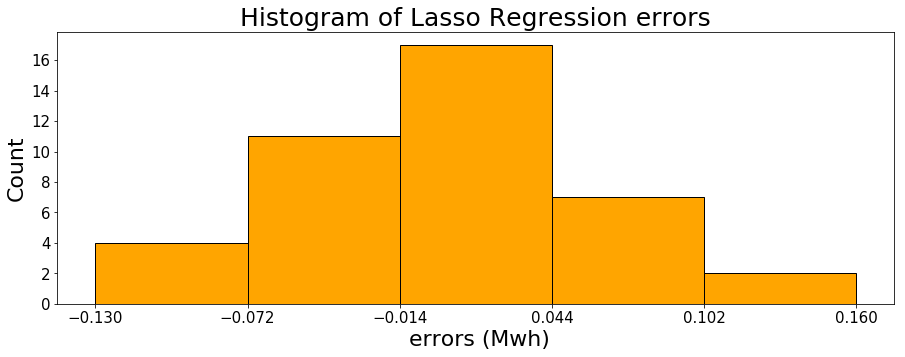

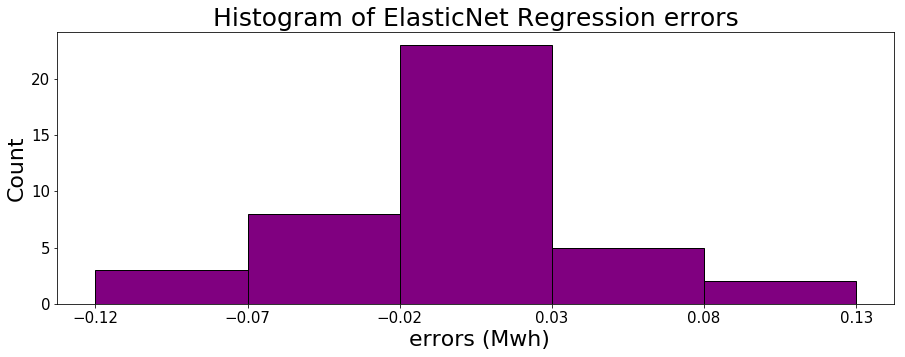

In [44]:
#Plotting historgram of regression methods errors

b=5
errors_r=errors.round(2)

for i , z in zip(errors_r.columns , colors):
    plt.figure(figsize=figsize)
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.hist(errors_r[i],bins=b, color=z ,edgecolor='k')
    plt.ylabel('Count', fontsize=labelfontsize)
    plt.xlabel(' errors (Mwh)' , fontsize=labelfontsize)
    plt.title("Histogram of {}".format(i) ,fontsize=titlefontsize)
    F=(np.nanmax(errors_r[i])-np.nanmin(errors_r[i]))/b+e
    plt.xticks(np.arange(np.nanmin(errors_r[i]), np.nanmax(errors_r[i])+F, F))
    plt.show()



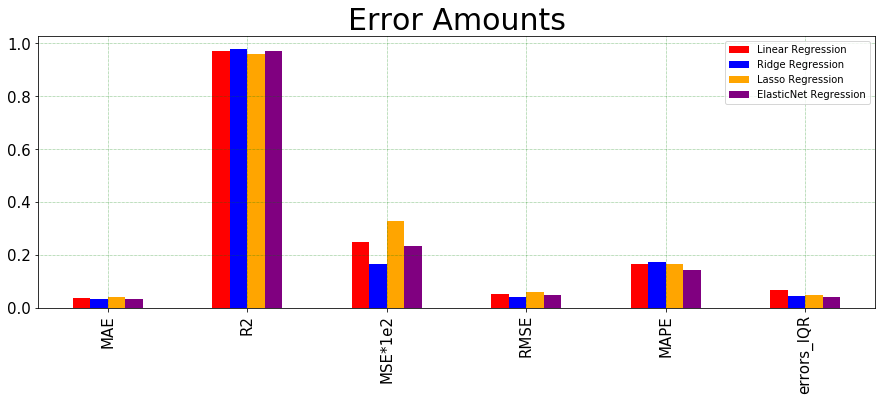

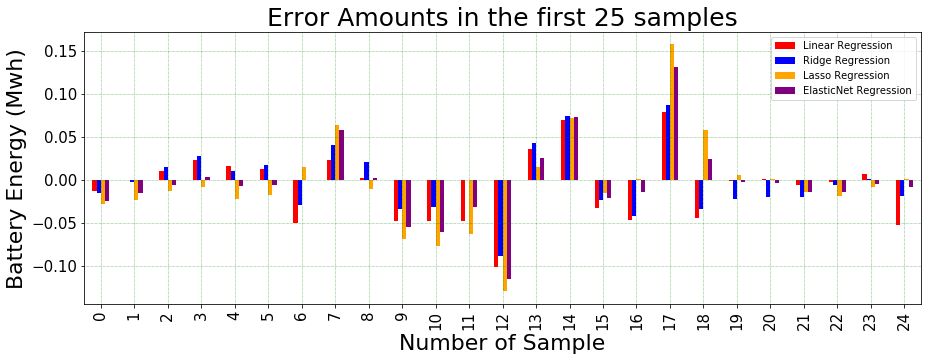

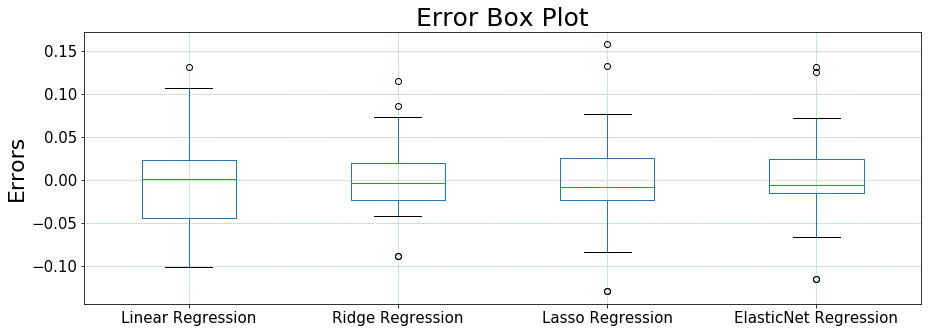

In [45]:
# plotting Error amounts

MSE_LK=mean_squared_error(y, y_pred_LK)
r2_LK=r2_score(y, y_pred_LK)
RMSE_LK= sqrt (MSE_LK)
MAE_LK= mean_absolute_error(y, y_pred_LK)
MAPE_LK=np.mean(np.abs((y - y_pred_LK) / y))




MSE_RK=mean_squared_error(y, y_pred_RK)
r2_RK=r2_score(y, y_pred_RK)
RMSE_RK= sqrt (MSE_RK)
MAE_RK= mean_absolute_error(y, y_pred_RK)
MAPE_RK=np.mean(np.abs((y - y_pred_RK) / y))



MSE_LAK=mean_squared_error(y, y_pred_LAK)
r2_LAK=r2_score(y, y_pred_LAK)
RMSE_LAK= sqrt (MSE_LAK)
MAE_LAK= mean_absolute_error(y, y_pred_LAK)
MAPE_LAK=np.mean(np.abs((y - y_pred_LAK) / y))




MSE_EK=mean_squared_error(y, y_pred_EK)
r2_EK=r2_score(y, y_pred_EK)
RMSE_EK= sqrt (MSE_EK)
MAE_EK= mean_absolute_error(y, y_pred_EK)
MAPE_EK=np.mean(np.abs((y - y_pred_EK) / y))




ERR= pd.DataFrame({'MAE': [MAE_LK , MAE_RK , MAE_LAK , MAE_EK],
                   'R2': [r2_LK , r2_RK , r2_LAK , r2_EK],
                   'MSE*1e2': [MSE_LK*100 ,MSE_RK*100 , MSE_LAK*100 , MSE_EK*100 ] , 
                   'RMSE':[RMSE_LK , RMSE_RK, RMSE_LAK , RMSE_EK],
                   'MAPE':[MAPE_LK , MAPE_RK, MAPE_LAK , MAPE_EK] ,
                   'errors_IQR':[iqr(errors_LK) , iqr(errors_RK) , iqr(errors_LAK) , iqr(errors_EK)] } ,
                    index=["Linear Regression" , "Ridge Regression" , "Lasso Regression" , "ElasticNet Regression" ])

ERR.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression"
                      , "orange":"Lasso regression" , "purple":"ElasticNet regression" }, figsize=(15,5))
plt.title('Error Amounts', fontsize=30)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.legend()
plt.show()




EA25=pd.DataFrame({"Linear Regression":y_pred_LK-y , "Ridge Regression":y_pred_RK-y 
                   , "Lasso Regression":y_pred_LAK-y , "ElasticNet Regression":y_pred_EK-y })

EA25.head(25).plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                              "orange":"Lasso regression" , "purple":"ElasticNet regression" },
                       figsize=figsize)
plt.title('Error Amounts in the first 25 samples', fontsize=titlefontsize)   
plt.xlabel('Number of Sample', fontsize=labelfontsize)
plt.ylabel('Battery Energy (Mwh)', fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()



errors.columns=["Linear Regression"]+["Ridge Regression"]+["Lasso Regression"]+["ElasticNet Regression"]
errors.boxplot(figsize=figsize)
plt.title('Error Box Plot', fontsize=titlefontsize) 
plt.ylabel('Errors',fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()




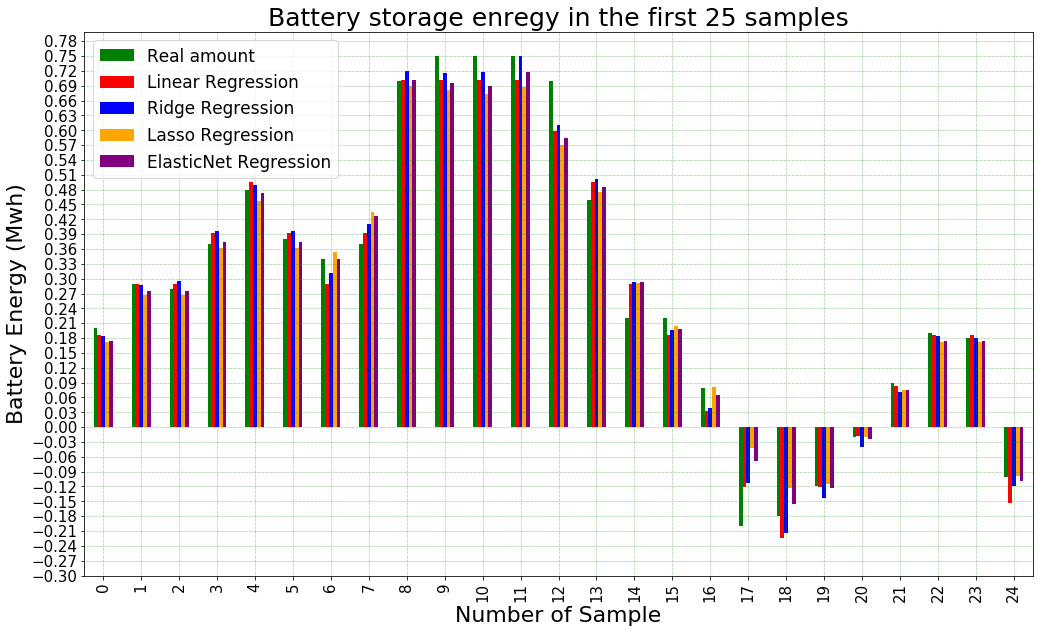

In [46]:
# plotting predicted values for battery energy in all regression models

pb=pd.DataFrame({'Real amount':y , "Linear Regression":y_pred_LK 
                 , "Ridge Regression":y_pred_RK , "Lasso Regression":y_pred_LAK , "ElasticNet Regression":y_pred_EK})

pb.head(25).plot.bar(color={ "green":"Real amount" , "red":"Linear regression" , "blue":"Ridge regression" ,
                            "orange":"Lasso regression" , "purple":"ElasticNet regression"}, figsize=(17,10))
plt.title('Battery storage enregy in the first 25 samples', fontsize=titlefontsize)       
plt.xlabel('Number of Sample', fontsize=labelfontsize)
plt.ylabel('Battery Energy (Mwh)', fontsize=labelfontsize)
EE=np.round(np.mean(abs(y-y_pred_RK)) , 2)
plt.yticks(np.arange(np.round(min(y)-EE , 1), max(y)+EE, EE))  
plt.legend(loc=2, prop={'size': 17})
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

## 5- Testing with New Sample
Now we can test the controlling system with new data to evaluate that.
In order to insert new data please enter the amounts of nine factors which are shown below:

***Time, Wind speed (Km/h), Wind plant working percantage, Air density (Kg/m3), Solar radietion intensity (Kwh/m2), Solar plant working percantage, Temprature, Relative humidity (%), Energy consumption (Mwh)***

*Remember to insert the amounts with a single space and without comma*

*In Time 0 means night and 1 means day*

*If you don't know one of requested amounts please enter 'NAN' instead of that*

##### Examples:

 ----> 0 55.0 80.0 1.23 0.0 100.0 25.0 85.0 1.3

 ----> 1 45 60.0 NAN 1000 75 33.0 90.0 1.5

 ----> 0 53.78 98.05 1.23 352.44 98.54 28.32 85.0 1.48

 ----> 1 NAN 40.0 NAN 700 95 22.0 75.0 1.1

In [47]:
NAN=np.nan
df2=df.drop(['b_eng'], axis=1)

print('Please enter the amounts:')
sample=list(input().split())
sample= np.array(sample, dtype='float')
sample=sample.reshape(1,-1)


sample=pd.DataFrame(sample)
sample.columns=df2.columns
sample=sample.fillna(df.mean())

LL=np.nanpercentile(df2, 5, axis=0)
HH=np.nanpercentile(df2, 95, axis=0)

sample=pywt.threshold(sample, LL, 'greater', LL)
sample=pywt.threshold(sample, HH, 'less', HH)

sample=pd.DataFrame(sample, index=['Preprossed Input'])

sample.columns=columns9


print("")
print('Preprocessed Input is:')


sample['Time'] = sample.Time.astype(int)

sample=sample.round(2)

display(sample)

sample=scaler.transform(sample)



sample_sfs=sample[: ,feat_cols ]





res_abs=pd.DataFrame(errors.abs())
best_method=res_abs.idxmin(axis = 1)



classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x,best_method)

considered_best_method = classifier.predict(sample)


if considered_best_method[0]=='Linear Regression':
    sample=sample[: ,feat_cols ]
    model=L
    print("Appropriate method according to the input is Linear Regression")
if considered_best_method[0]=='Ridge Regression' :
    model=R
    print("Appropriate method according to the input is Ridge Regression")
if considered_best_method[0]=='Lasso Regression':
    model=LA
    print("Appropriate method according to the input is Lasso Regression")
if considered_best_method[0]=='ElasticNet Regression' :
    model=E
    print("Appropriate method according to the input is ElasticNet Regression")


y_pred_sample=model.predict(sample)
y_pred_sample=np.around(y_pred_sample, decimals=3)
print(*['Optimised value for battery energy is =', y_pred_sample [0] ,'(MWh)'])


Please enter the amounts:
0 55.0 80.0 1.23 0.0 100.0 25.0 85.0 1.3

Preprocessed Input is:


,Time,Wind speed (Km/h),Wind plant working percantage,Air density (Kg/m3),Solar radietion intensity (Kwh/m2),Solar plant working percantage,Temprature (C),Relative humidity (%),Energy consumption (MWh)
Preprossed Input,0,55.0,80.0,1.23,0.0,100.0,25.0,85.0,1.3


Appropriate method according to the input is Lasso Regression
Optimised value for battery energy is = -0.099 (MWh)


C:\Users\HosseinSLT\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.


## 6- Conclusion
In this investigation four regression methods including Linear Regression, Ridge Regression, Lasso Regression and ElasticNet Regression used to predict optimise value of battery energy in order to make the smart grid stable to supply enegry which was needed in each hour. Next, error amounts in different regression methods compared and using KNN classification method the best method to predict target value according to amount of features considered as the "Appropriate method". Finally you can see optimised value for battery energy according to the Appropriate method. 

My perpuse to do this investigate is to get familliar with different regression methods and to show my intrest to work in ML field. I'm looking forward to useing Reinforcement learning to achive better results. I hope in this way you help me with your advice and the facilities which are needed.

<img src="img/1.png">